In [1]:
import os 
import sys
import numpy as np
import pytorch_lightning as L
import torch
sys.path.append("/home/sonja/PROJECTS/multiview_deconf_VAE/Multi-view-Deconfounding-VAE")
from models.cXVAE import * 
from models.clustering import *
from Data.preprocess import *
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from Data.load_confounders import *

import umap


/home/sonja/anaconda3/envs/env_multiviewVAE/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sonja/anaconda3/envs/env_multiviewVAE/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/sonja/anaconda3/envs/env_multiviewVAE/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")
/home/sonja/anaconda3/envs/env_multiviewVAE/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this arg

In [2]:
def do_umap(z):
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(z)
    return embedding

# Load Data

In [19]:
''' Load data '''

### PATH on EMC: 
## PATH_data = "/data/scratch/skatz/PROJECTS/multiview_VAE/data"
## PATH_data = "/data/scratch/skatz/PROJECTS/multiview_VAE/data"
PATH_data = f"{os.getcwd()}/Data"

X1_orig, X2_orig, Y_orig = load_originalData(PATH_data)
X1_orig = scale(X1_orig); X2_orig = scale(X2_orig)
X_orig_combined = np.concatenate((X1_orig, X2_orig), axis=1)

X1_linear, X2_linear, Y_linear, conf_linear, conf_labels_linear = load_linearConfounder(PATH_data)
X1_linear = scale(X1_linear); X2_linear = scale(X2_linear)
X_linear_combined = np.concatenate((X1_linear, X2_linear), axis=1)

X1_squared, X2_squared, Y_squared, conf_squared, conf_labels_squared = load_squaredConfounder(PATH_data)
X1_squared = scale(X1_squared); X2_squared = scale(X2_squared)
X_squared_combined = np.concatenate((X1_squared, X2_squared), axis=1)

X1_categ, X2_categ, Y_categ, conf_categ, conf_labels_categ = load_categoricalConfounder(PATH_data)
X1_categ = scale(X1_categ); X2_categ = scale(X2_categ)
X_categ_combined = np.concatenate((X1_categ, X2_categ), axis=1)

X1_categ2, X2_categ2, Y_categ2, conf_categ2, conf_labels_categ2 = load_categoricalConfounder2(PATH_data)
X1_categ2 = scale(X1_categ2); X2_categ2 = scale(X2_categ2)
X_categ2_combined = np.concatenate((X1_categ2, X2_categ2), axis=1)

Global seed set to 1234
Global seed set to 1234
Global seed set to 1234


Shape of confounders: torch.Size([2547, 1])


Global seed set to 1234


Shape of confounders: torch.Size([2547, 1])


Global seed set to 1234


Shape of confounders: torch.Size([2547, 6])
Shape of confounders: torch.Size([2547, 6])


# Plot all simulated confounders

- original:  ["#343e44","#4b5a62", "#6f7b81", "#939ca1", "#b7bdc0", "#dbdee0"]

- 

In [ ]:
# from matplotlib.colors import LinearSegmentedColormap

# cmap = ["#343e44","#4b5a62", "#6f7b81", "#939ca1", "#b7bdc0", "#dbdee0"]
# cmap = LinearSegmentedColormap.from_list("cmap", cmap)


cmap_orig =  ["#96C3F0", "#FFF7AE", "#FFBA90", "#FF8C8A", "#E76E7A"]
cmap_deconf =  ["#6699CC", "#FFF275", "#FF8C42", "#FF3C38", "#A23E48"]

cmap_orig = LinearSegmentedColormap.from_list("cmap_orig", cmap_orig)
cmap_deconf = LinearSegmentedColormap.from_list("cmap_deconf", cmap_deconf)


# Not confounded

In [17]:
X_orig_combined.shape

(2547, 4000)

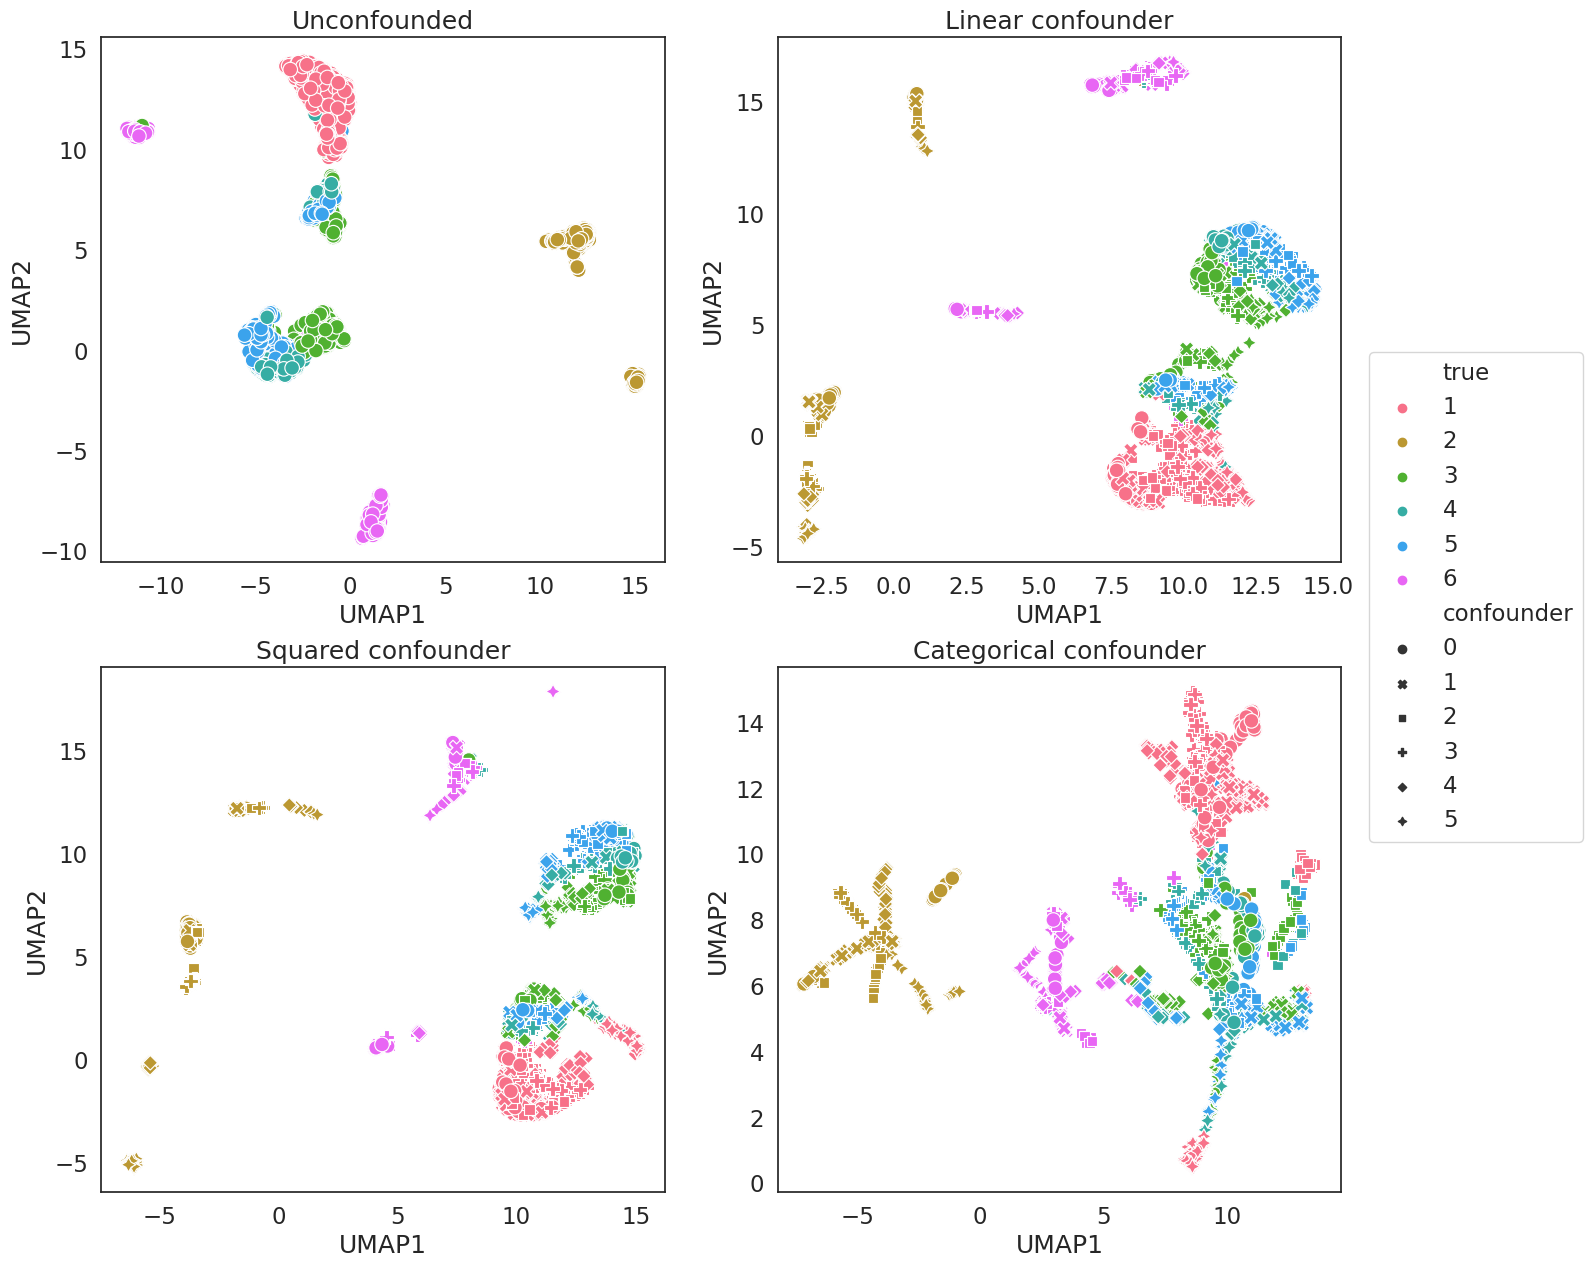

In [26]:
sns.set_theme(style="white", font_scale=1.5)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,15))

cmap = sns.color_palette("husl", 6)

### Unconfouded data
embedding_orig = do_umap(X2_orig)
df_orig = pd.concat([pd.DataFrame(embedding_orig), pd.DataFrame(Y_orig)], axis=1)
df_orig.columns = ["UMAP1", "UMAP2", "true_label"]
sns.scatterplot(data=df_orig, x="UMAP1", y="UMAP2", hue="true_label", s=110, ax=ax1, palette=cmap, legend=False) 
ax1.set_title(f"Unconfounded")

### linear
embedding_conf = do_umap(X2_linear)
df_conf = pd.concat([pd.DataFrame(embedding_conf), pd.DataFrame(Y_linear), pd.DataFrame(conf_labels_linear)], axis=1)
df_conf.columns = ["UMAP1", "UMAP2", "true_label", "conf_label"]
sns.scatterplot(data=df_conf, x="UMAP1", y="UMAP2", hue="true_label", style="conf_label", s=110, ax=ax2, palette=cmap, legend=False) 
ax2.set_title(f"Linear confounder")

### square
embedding_conf = do_umap(X2_squared)
df_conf = pd.concat([pd.DataFrame(embedding_conf), pd.DataFrame(Y_squared), pd.DataFrame(conf_labels_squared)], axis=1)
df_conf.columns = ["UMAP1", "UMAP2", "true_label", "conf_label"]
sns.scatterplot(data=df_conf, x="UMAP1", y="UMAP2", hue="true_label", style="conf_label", s=110, ax=ax3, palette=cmap, legend=False) 
ax3.set_title(f"Squared confounder")

### categ2
embedding_conf = do_umap(X2_categ2)
df_conf = pd.concat([pd.DataFrame(embedding_conf), pd.DataFrame(Y_categ2), pd.DataFrame(conf_labels_categ2)], axis=1)
df_conf.columns = ["UMAP1", "UMAP2", "true", "confounder"]
df_conf["true"] = df_conf["true"].astype("int64")
df_conf["confounder"] = df_conf["confounder"].astype("int64")
sns.scatterplot(data=df_conf, x="UMAP1", y="UMAP2", hue="true", style="confounder", s=110, ax=ax4, palette=cmap) 
ax4.set_title(f"Categorical confounder")

plt.legend(bbox_to_anchor=(1.05, 1.6), borderaxespad=0., loc=2)
#plt.tight_layout()
plt.savefig(f"{os.getcwd()}/figures/all_confounders_dnam.png", dpi=300)

# cXVAE

In [24]:
PATH_model = "/data/scratch/skatz/PROJECTS/multiview_VAE"

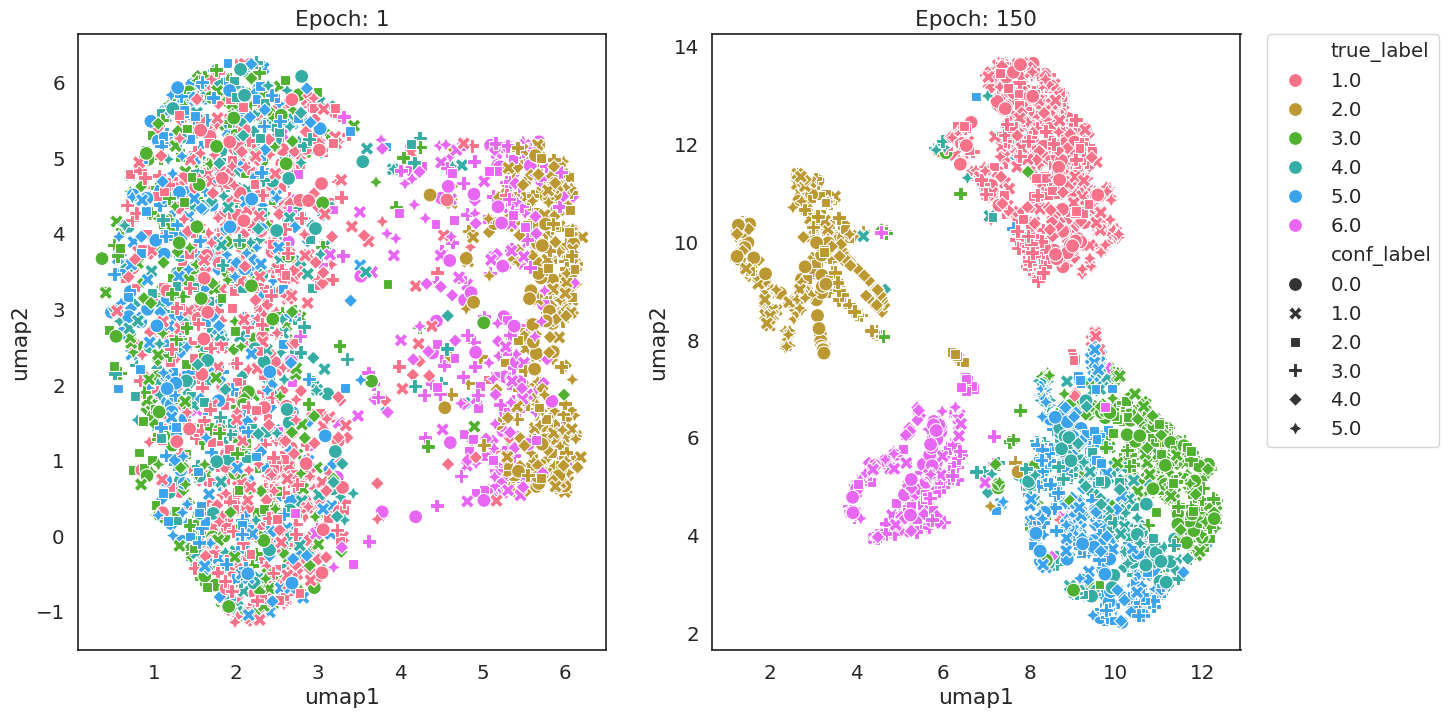

In [12]:
sns.set_theme(style="white", font_scale=1.3)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))


modelname = f"confounded_categ2/cXVAE/cXVAE_inputEmbed"
cmap = sns.color_palette("husl", 6)

for epoch, ax in zip([1,150], [ax1, ax2]):

    ckpt_path = f"{PATH_model}/lightning_logs/{modelname}/epoch{epoch}/checkpoints"
    ckpt_file = f"{ckpt_path}/{os.listdir(ckpt_path)[0]}"
    model = cXVAE_inputEmbed.load_from_checkpoint(ckpt_file, map_location=torch.device('cpu'))
    z = model.generate_embedding(X1_categ2, X2_categ2, conf_categ2).detach().numpy()
    embedding = do_umap(z)

    df = pd.concat([pd.DataFrame(embedding), pd.DataFrame(Y_categ2), pd.DataFrame(conf_labels_categ2)], axis=1)
    df.columns = ["umap1", "umap2", "true_label", "conf_label"]
    df

    if epoch < 2: 
        sns.scatterplot(data=df, x="umap1", y="umap2", hue="true_label", style="conf_label", s=100, ax=ax, palette=cmap, legend=False) 
    else:
        sns.scatterplot(data=df, x="umap1", y="umap2", hue="true_label", style="conf_label", s=100, ax=ax, palette=cmap) 
    ax.set_title(f"Epoch: {epoch}")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

FileNotFoundError: [Errno 2] No such file or directory: '/data/scratch/skatz/PROJECTS/multiview_VAE/lightning_logs/confounded_categ2/cXVAE/cXVAE_inputEmbed/epoch150/checkpoints'

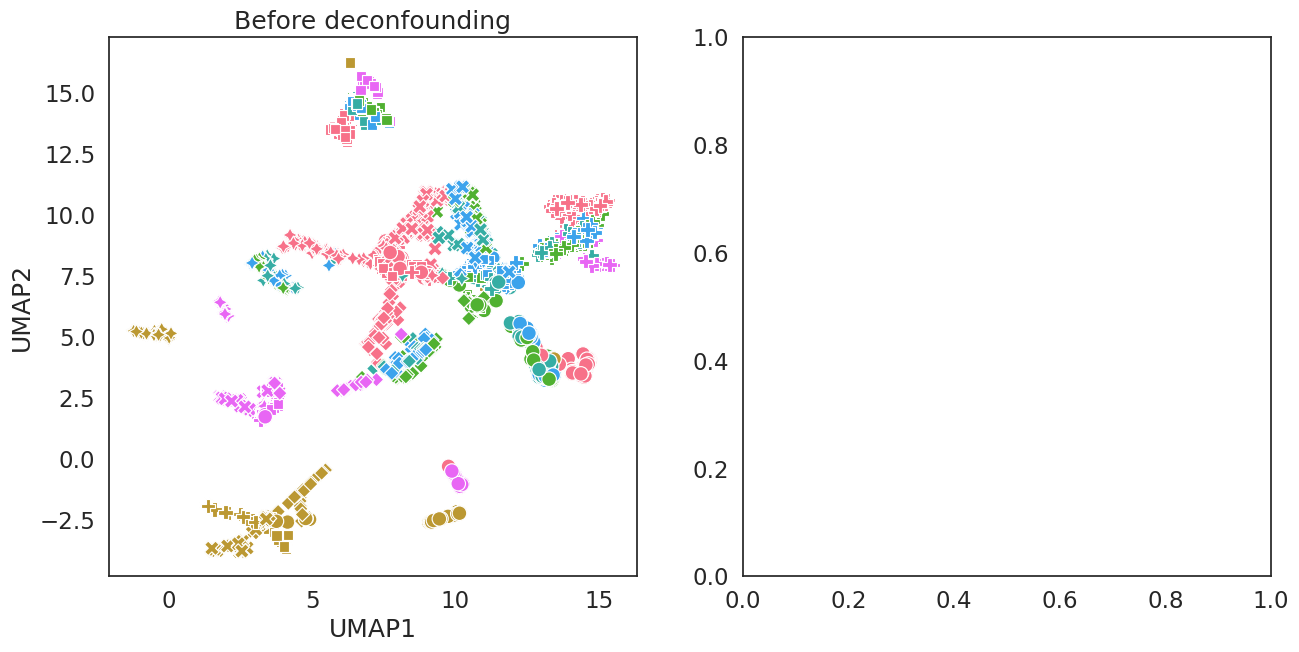

In [25]:
sns.set_theme(style="white", font_scale=1.5)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))


modelname = f"confounded_categ2/cXVAE/cXVAE_inputEmbed"
cmap = sns.color_palette("husl", 6)

### Confounded data 
embedding_conf = do_umap(X_categ2_combined)
df_conf = pd.concat([pd.DataFrame(embedding_conf), pd.DataFrame(Y_categ2), pd.DataFrame(conf_labels_categ2)], axis=1)
df_conf.columns = ["UMAP1", "UMAP2", "true_label", "conf_label"]
sns.scatterplot(data=df_conf, x="UMAP1", y="UMAP2", hue="true_label", style="conf_label", s=110, ax=ax1, palette=cmap, legend=False) 
ax1.set_title(f"Before deconfounding")

### Deconfounded - after epoch 150 
epoch=150
ckpt_path = f"{PATH_model}/lightning_logs/{modelname}/epoch{epoch}/checkpoints"
ckpt_file = f"{ckpt_path}/{os.listdir(ckpt_path)[0]}"
model = cXVAE_inputEmbed.load_from_checkpoint(ckpt_file, map_location=torch.device('cpu'))
z = model.generate_embedding(X1_categ2, X2_categ2, conf_categ2).detach().numpy()
embedding = do_umap(z)
df = pd.concat([pd.DataFrame(embedding), pd.DataFrame(Y_categ2), pd.DataFrame(conf_labels_categ2)], axis=1)
df.columns = ["UMAP1", "UMAP2", "true", "confounder"]
df["true"] = df["true"].astype("int64")
df["confounder"] = df["confounder"].astype("int64")

sns.scatterplot(data=df, x="UMAP1", y="UMAP2", hue="true", style="confounder", s=110, ax=ax2, palette=cmap) 
#ax2.set_title(f"Epoch: {epoch}")
ax2.set_title(f"After deconfounding")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.savefig(f"{os.getcwd()}/figures/cXVAE_categ2_v2.png", dpi=300)

### Linear & squared

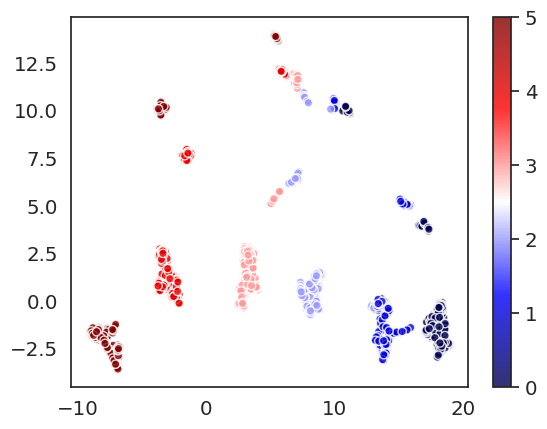

In [73]:
#embedding_conf = do_umap(X1_linear)
df_conf = pd.concat([pd.DataFrame(embedding_conf), pd.DataFrame(Y_linear), pd.DataFrame(conf_labels_linear)], axis=1)
df_conf.columns = ["umap1", "umap2", "true_label", "conf_label"]

plt.scatter(df_conf["umap1"], df_conf["umap2"], alpha = .8, c = df_conf["conf_label"], cmap = 'seismic', linewidth=1, edgecolors="white")
cbar = plt.colorbar()

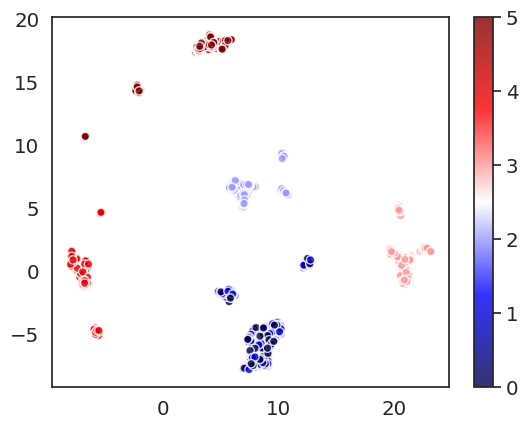

In [76]:
embedding_conf = do_umap(X1_squared)
df_conf = pd.concat([pd.DataFrame(embedding_conf), pd.DataFrame(Y_squared), pd.DataFrame(conf_labels_squared)], axis=1)
df_conf.columns = ["umap1", "umap2", "true_label", "conf_label"]

plt.scatter(df_conf["umap1"], df_conf["umap2"], alpha = .8, c = df_conf["conf_label"], cmap = 'seismic', linewidth=1, edgecolors="white")
cbar = plt.colorbar()

# adversarial trg

/home/sonja/anaconda3/envs/env_multiviewVAE/lib/python3.10/site-packages/pytorch_lightning/utilities/migration/utils.py:49: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.0.1.post0, which is newer than your current Lightning version: v2.0.0
  rank_zero_warn(


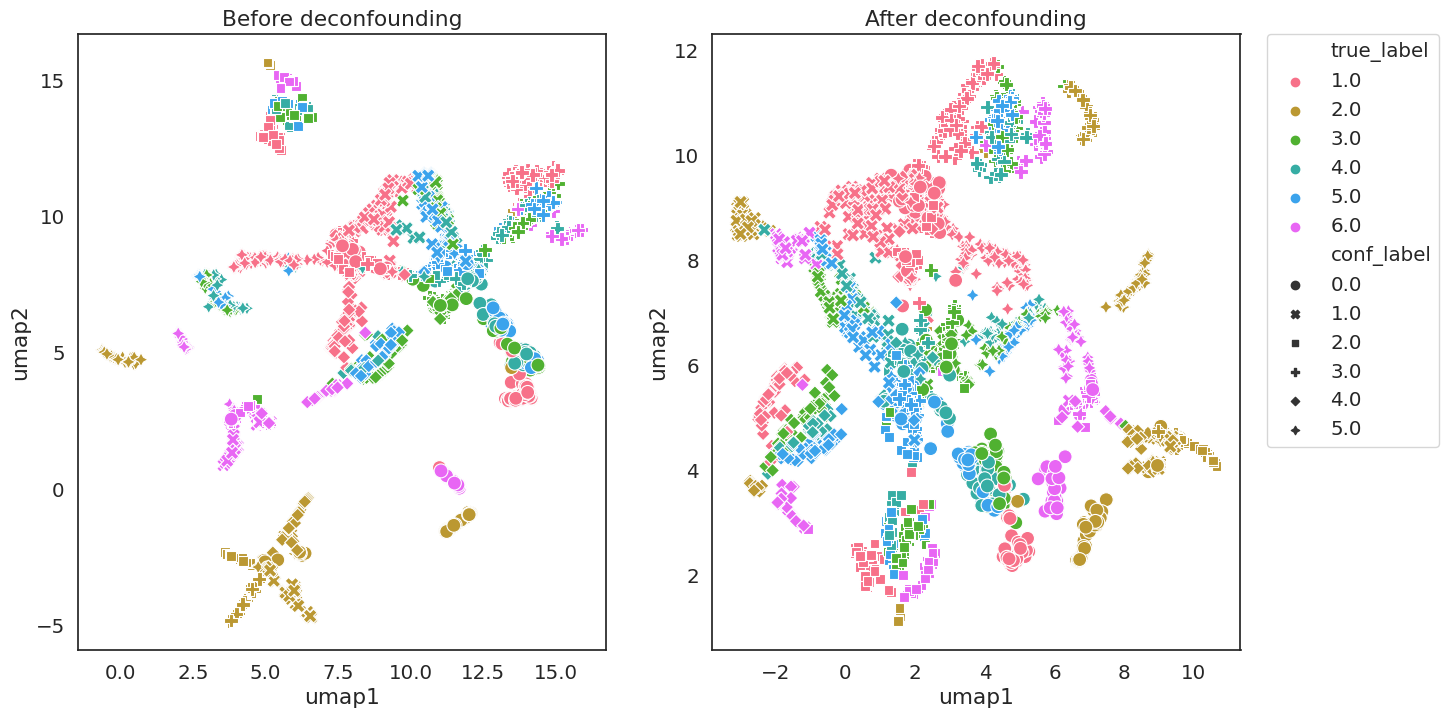

In [22]:
from models.adversarial_XVAE_multiclass import XVAE_scGAN_multiclass

sns.set_theme(style="white", font_scale=1.3)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))
modelname = "confounded_categ2/XVAE_advTraining/XVAE_advTraining_scGAN_multiclass"
cmap = sns.color_palette("husl", 6)

### Confounded data 
embedding_conf = do_umap(X_categ2_combined)
df_conf = pd.concat([pd.DataFrame(embedding_conf), pd.DataFrame(Y_categ2), pd.DataFrame(conf_labels_categ2)], axis=1)
df_conf.columns = ["umap1", "umap2", "true_label", "conf_label"]
sns.scatterplot(data=df_conf, x="umap1", y="umap2", hue="true_label", style="conf_label", s=100, ax=ax1, palette=cmap, legend=False) 
ax1.set_title(f"Before deconfounding")

### Deconfounded - after epoch 150 
ls = 50
## pretrainig epochs
epochs_preTrg_ae = 5        #10
epochs_preTrg_advNet = 5    #10
## adversarial training epochs
epochs_ae_w_advNet = 150

ckpt_path = f"{os.getcwd()}/lightning_logs/{modelname}/XVAE_adversarialTrg/epoch{epochs_ae_w_advNet}/checkpoints"
ckpt_file = f"{ckpt_path}/{os.listdir(ckpt_path)[0]}"
ckpt_xvae_path = f"{os.getcwd()}/lightning_logs/{modelname}/pre_XVAE/epoch{epochs_preTrg_ae}/checkpoints"
ckpt_xvae_file = f"{ckpt_xvae_path}/{os.listdir(ckpt_xvae_path)[0]}"
ckpt_advNet_path = f"{os.getcwd()}/lightning_logs/{modelname}/pre_advNet/epoch{epochs_preTrg_advNet}/checkpoints"
ckpt_advNet_file = f"{ckpt_advNet_path}/{os.listdir(ckpt_advNet_path)[0]}"

model = XVAE_scGAN_multiclass.load_from_checkpoint(ckpt_file,
            PATH_xvae_ckpt=ckpt_xvae_file, PATH_advNet_ckpt=ckpt_advNet_file)
z = model.xvae.generate_embedding(X1_categ2, X2_categ2).detach().numpy()
embedding = do_umap(z)
df = pd.concat([pd.DataFrame(embedding), pd.DataFrame(Y_categ2), pd.DataFrame(conf_labels_categ2)], axis=1)
df.columns = ["umap1", "umap2", "true_label", "conf_label"]

sns.scatterplot(data=df, x="umap1", y="umap2", hue="true_label", style="conf_label", s=100, ax=ax2, palette=cmap) 
#ax2.set_title(f"Epoch: {epoch}")
ax2.set_title(f"After deconfounding")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)